Minima of function: -1.495
Total iterations: 384


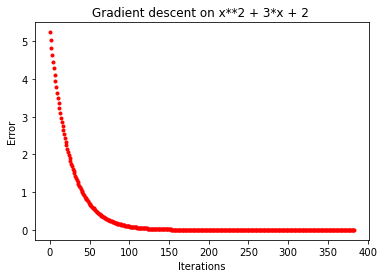

In [3]:
#------------------------------------ASSIGNMENT-7 AVI KHANDELWAL 204102301-------------------------------------------------

#-------------------------------------------------------Q1----------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

x,y = symbols('x y')

f1 = x**2 + 3*x + 2 #Defining f1
del_f1 = diff(f1, x) #Differenciating f1
lr = 0.01 # Learning rate, chosen by trial and error
x0 = 10 # Initial point
count = 0 #Iterations count
error = []

while True:
    count = count + 1
    x1 = x0 - lr*del_f1.subs(x,x0) # Gradient Descent algorithm
    e = abs(f1.subs(x,x0) - f1.subs(x,x1))
    error.append(e)
    if  e < 10**(-6): # Error value chosen by trial and error
        x0 = x1
        break
    x0 = x1

#Results
print("Minima of function: %0.3f"%(x0))
print("Total iterations:",count)

# Visualisation
X = np.arange(0,count)
plt.plot(X,error,'.',color='r')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Gradient descent on x**2 + 3*x + 2 ")
plt.show()

Minima of function:(0.003,0.003)
Total iterations: 395


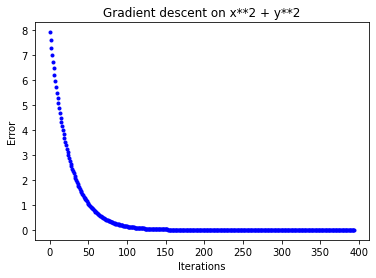

In [5]:
#-------------------------------------------------------Q2----------------------------------------------------------------

f2 = x**2 + y**2 #Defining f2
del_f2_x = diff(f2, x) #Differenciating f2 with respect to x
del_f2_y = diff(f2, y) #Differenciating f2 with respect to y

lr = 0.01 # Learning rate, chosen by trial and error
x0 = 10 # Initial points
y0 = 10
count = 0 #Iterations count
error = []

while True:
    count = count + 1
    # Gradient Descent algorithm
    x1 = x0 - lr*del_f2_x.subs(x,x0)
    y1 = y0 - lr*del_f2_y.subs(y,y0)
    e = abs(f2.subs([(x,x1),(y,y1)]) - f2.subs([(x,x0),(y,y0)]))
    error.append(e)
    if  e < 10**(-6): # Error value chosen by trial and error
        x0 = x1
        y0 = y1
        break
    x0 = x1
    y0 = y1
    
#Results
print("Minima of function:(%0.3f,%0.3f)"%(x0,y0))
print("Total iterations:",count)

# Visualisation
X = np.arange(0,count)
plt.plot(X,error,'.',color='b')
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Gradient descent on x**2 + y**2")
plt.show()

Iteration:0, error:0.440259
Iteration:100, error:0.193985
Iteration:200, error:0.137444
Iteration:300, error:0.107247
Iteration:400, error:0.086924
Iteration:500, error:0.072209
Iteration:600, error:0.061063
Iteration:700, error:0.052355
Iteration:800, error:0.045395
Iteration:900, error:0.039733


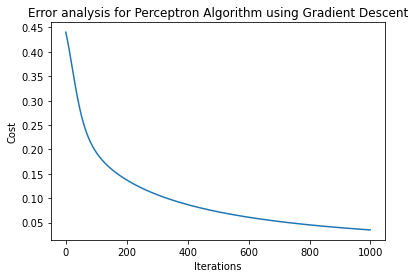

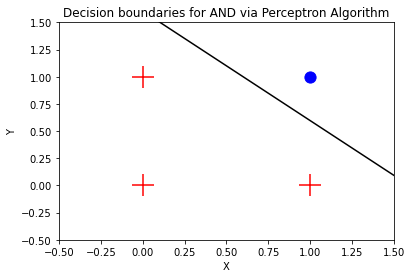

In [14]:
#-------------------------------------------------------Q3(a)----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

#Activation Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sig_der(z):
    return sigmoid(z)*(1-sigmoid(z))

w = np.random.randn(1,3) # Weight vector
X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]) #Input vector
X = X.T
d = np.array([0,0,0,1]) #Target ouputs
D = np.matmul(w,X).flatten() #Acttual outputs
lr = 0.1 #Learning rate, arbitrarily chosen
cost = []
epochs = 1000 #Total iterations

for j in range(epochs):
    c = 0 # Cost
    for i in range(4):
        D = sigmoid(np.matmul(w,X[:,i])) # Calculating Target output
        w = w - lr*(D-d[i])*sig_der(D)*X[:,i] # Updating the weight vector via Gradient Descent
        c = (c + (D-d[i])**2)/2 #Calculating error
    if j%100 == 0:
        print("Iteration:%d, error:%f" %(j,c))
    cost.append(c)
    
#Visualisations

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Error analysis for Perceptron Algorithm using Gradient Descent")
plt.show()
#Plotting the 4 training examples

plt.scatter(0,0,marker='+',color='r',s=500)
plt.scatter(0,1,marker='+',color='r',s=500)
plt.scatter(1,0,marker='+',color='r',s=500)
plt.scatter(1,1,marker='.',color='b',s=500)

x = np.arange(-0.5,50,0.5)

#Decision Boundaries
y = (-w[0][0] - w[0][2]*x)/w[0][1]
plt.plot(x,y,color='k')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision boundaries for AND via Perceptron Algorithm")
plt.show()

Iteration:0, error:0.494295
Iteration:10000, error:0.011777
Iteration:20000, error:0.005243
Iteration:30000, error:0.003356
Iteration:40000, error:0.002463
Iteration:50000, error:0.001944
Iteration:60000, error:0.001605
Iteration:70000, error:0.001367
Iteration:80000, error:0.001190
Iteration:90000, error:0.001053


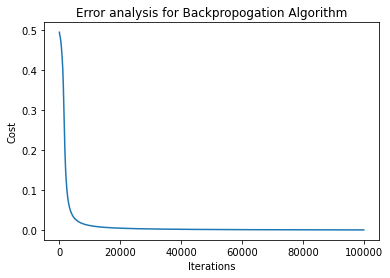

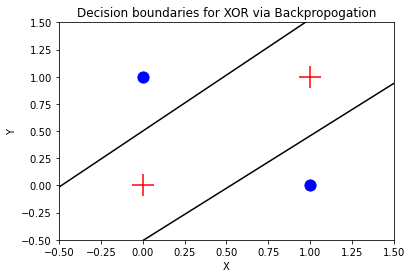

In [15]:
#-------------------------------------------------------Q3(b)----------------------------------------------------------------

#Forward propogation Algorithm
def forward(x,w1,w2,predict=False):
    z1 = np.matmul(x,w1) # Output from hidden layer before activation
    a1 = sigmoid(z1) # Output from hidden layer after activation
    bias = np.ones((len(a1),1)) # Increasing the dimension to accomodate the bias
    a1 = np.concatenate((bias,a1),axis = 1)
    z2 = np.matmul(a1,w2) # Final output before activation
    a2 = sigmoid(z2) # Final output after activation
    if predict:
        return a2
    return z1,a1,z2,a2
    
#Backpropogation Algorithm
def backprop(z2,x,a1,a2,y):
    del2 = a2-y #Error at the output layer
    Del2 = np.matmul(a1.T,del2) #Gradient computation for output layer
    del1 = (del2.dot(w2[1:,:].T))*sig_der(z1) #Error at the hidden layer
    Del1 = np.matmul(x.T,del1) #Gradient computation for hidden layer
    return del2,Del1,Del2
    

X = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]) #Input matrix

y = np.array([[0],[1],[1],[0]]) #Output matrix

w1 = np.random.randn(3,2) # Weights at the hidden layer
w2 = np.random.randn(3,1) # Weights at the output layer

lr = 0.1 # Learning rate, arbitrarily chosen
costs = [] 
epochs = 10**5 # Total iterations

for i in range(epochs):
    z1,a1,z2,a2 = forward(X,w1,w2) # Forward Progation 
    del2,Del1,Del2 = backprop(z2,X,a1,a2,y) #Backpropogation
    #Updating weights via Gradient descent
    w1 = w1 - lr*(1/4)*Del1
    w2 = w2 - lr*(1/4)*Del2
    c = np.mean(np.abs(del2)) #Computing costs
    costs.append(c)
    if i%10000 == 0:
        print("Iteration:%d, error:%f" %(i,c))

#Viualisation

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Error analysis for Backpropogation Algorithm")
plt.show()

#Plotting the 4 training examples
plt.scatter(0,0,marker='+',color='r',s=500)
plt.scatter(0,1,marker='.',color='b',s=500)
plt.scatter(1,0,marker='.',color='b',s=500)
plt.scatter(1,1,marker='+',color='r',s=500)

w1 = w1.T
w2 = w2.T
x = np.arange(-0.5,50,0.5)

#Decision Boundaries
y1 = (-w1[0][0] - w1[0][2]*x)/w1[0][1]
y2 = (-w1[1][0] - w1[1][2]*x)/w1[1][1]

plt.plot(x,y1,color='k')
plt.plot(x,y2,color='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.title("Decision boundaries for XOR via Backpropogation")
plt.show()